# Приоритизация гипотез. Анализ A/B - теста

# Описание проекта:

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

# Описание данных:

**Данные для первой части**

`/datasets/hypothesis.csv.`
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части:**

`/datasets/orders.csv.`
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

`/datasets/visitors.csv.`
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# Приоритизация гипотез.

В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача:
1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

# Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.

Задача

Проанализируйте A/B-тест:
1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивного среднего количества заказов по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

**Цель исследования** - Исследовать гипотезы 

Вместе с отделом маркетинга увеличить выручку 

Нам предстоит провести:

1. Часть 1. Приоритезацию гипотиз
2. Часть 2. Анализ A/B-теста

**Ход исселдования** 

Данные о приоритизации гипотиз мы получучаем из файла: 
1. приоритизация гипотез: `/datasets/hypothesis.csv`

2. проведение анализа A/B теста: `/datasets/orders.csv` и `/datasets/visitors.csv`

О качестве данных  ничего не известно. Поэтому перед проверкой гипотиз проведём обзор данных.
Проверим данные и оценим их влияние на исследование. Исправим критические ошибки в данных, если они есть.

Исследование пройдёт в 3 этапа:

1. Проверка данных
2. Приоритизация результатов гипотез
3. Анализ A/B теста 

### Загрузим данные и подготовим их к анализу 

Загрузим данные для исследования 

**Пути к файлам**
-  `/datasets/hypothesis.csv` - гипотезы
-  `/datasets/orders.csv` - заказы
-  `/datasets/visitors.csv` - пользователи


#### Загружаем необходимые библиотеки 

In [106]:
# Импортируем необходимые модули для работы с проектом
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

#### Загрузим данные в переменные

In [107]:
# Загрузим датасеты в переменные: data, orders, visitors 
try:data = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv') 
except:data = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
try:orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
except:orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
try:visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
except:visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

##### Выведем информацию  на экран: посмотрим на данные в целом

In [108]:
# выводим информацию о гипотезах
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [109]:
# Посмотрим на таблицу о гипотезах 
display(data)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [110]:
# выводим информацию о заказах
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [111]:
# посмотрим на таблицу о заказах
display(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [112]:
# посмотрим на таблицу о пользователях
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [113]:
# выведем таблицу о пользователях 
display(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


**Вывод**:  Необходимо изменить тип файлов с object на to_datetime, там где это необходимо

#### Изучим данные и выполним предоработку данных. Проверим на наличие дубликатов и пропусков.  Приведём к нормальному типу.

##### Проверим данные на наличие дубликатов 

In [114]:
# проверим дубликаты в гипотезах 
data.duplicated().sum()

0

In [115]:
# проверим дубликаты в заказах 
orders.duplicated().sum()

0

In [116]:
# проверим дубликаты в пользователях 
visitors.duplicated().sum()

0

##### Проверим данные на наличие пропусков 

In [117]:
# проверим пропуски в гипотезах
data.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [118]:
# проверим пропуски в заказах
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [119]:
# проверим пропуски в пользователях
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

Вывод : Проверку прошли, дубликатов и пропусков нет

##### Убедимся что типы данных  соответсвуют сохранённых  в них значениях

###### Разберём датафрейм orders 

In [120]:
# изменим в датафрейме orders тип даты c object на to_datetime
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


###### разберём датафрейм visitors


In [121]:
# изменим в датафрейме visitors тип даты c object на to_datetime
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


**Вывод** : Данные проверили, дубликатов и пропусков нет. 

Преобразовали тип данных:

/ orders - date, из object в datetime

/ visitors - date, из object в datetime

**Выясним**:

**Проверим не попадают ли пользователи в обе группы**:

In [122]:
# найдём пользывателей в каждой группе
g_A = orders[orders['group']=='A']['visitorId']
g_B = orders[orders['group']=='B']['visitorId']

In [123]:
# найдём пользователей в обеих группах
# найдём пересечение двух  одномерных массивов с помощью метода numpy.intersect1d()
g_A_B = np.intersect1d(g_A, g_B)
print('Пересекающие пользователи в обеих группах:')
print(g_A_B)
print('Количество пересекающихся пользователей:')
print(g_A_B.shape[0])

Пересекающие пользователи в обеих группах:
[   8300375  199603092  232979603  237748145  276558944  351125977
  393266494  457167155  471551937  477780734  818047933  963407295
 1230306981 1294878855 1316129916 1333886533 1404934699 1602967004
 1614305549 1648269707 1668030113 1738359350 1801183820 1959144690
 2038680547 2044997962 2378935119 2458001652 2579882178 2587333274
 2600415354 2654030115 2686716486 2712142231 2716752286 2780786433
 2927087541 2949041841 2954449915 3062433592 3202540741 3234906277
 3656415546 3717692402 3766097110 3803269165 3891541246 3941795274
 3951559397 3957174400 3963646447 3972127743 3984495233 4069496402
 4120364173 4186807279 4256040402 4266935830]
Количество пересекающихся пользователей:
58


In [124]:
# Удалим данных пользователей из таблицы:
orders = orders[~orders['visitorId'].isin(g_A_B)]

**За какой период нам доступны данные, дата начала и дата окончания теста**:
- Проверим датафрейм orders 

In [125]:
# start_test - дата начала теста
print('start_test:', orders['date'].min())
# end_test - дата окончания теста
print('end_test:',  orders['date'].max())

start_test: 2019-08-01 00:00:00
end_test: 2019-08-31 00:00:00


**Вывод**: Данные нам доступны за месяц. с 2019-08-01 по 2019-08-31 

**Сколько у нас уникальных групп и количество пользователей в каждой**:

In [126]:
# Количество пользователей в группе A
print('пользователей в группе A:', orders[orders['group']=='A']['visitorId'].unique().shape[0])
# Количество пользователей в группе B
print('пользователей в группе B:', orders[orders['group']=='B']['visitorId'].unique().shape[0])

пользователей в группе A: 445
пользователей в группе B: 528


В группе B у нас больше пользователей чем в группе A. Вероятнее тест уже будет в пользу группы B. В части 2 проверим.

### Приоритизация гипотез

В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

#### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [127]:
# посчитаем ICE для гипотез
data['ICE'] = (data['Impact'] * data['Confidence'])/ data['Efforts']
# выведем на экран и отсортируем их по убыванию приоритетат
display(data[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False).round(2))
pd.options.display.max_colwidth = 210

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Вывод: Применив фрейморк ICE получили. Что самые перспективные гипотезы:
- Первое место гипотеза номер 8, 
- Второе место гипотеза 0,
- Третье место гипотеза 7.

#### Применим фреймворк RICE для приоритезации гипотез. Отсортируем их по убыванию приоритета.

In [128]:
# посчитаем RICE для гипотез
data['RICE'] = (data['Reach'] * data['Impact'] * data['Confidence'])/ data['Efforts']
# выведем на экран и отсортируем их по убыванию
display(data[['Hypothesis','RICE']].sort_values(by='RICE',ascending=False).round(2))
pd.options.display.max_colwidth = 210

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Вывод: Применив фреймфорк RICE получили. 
- на первом месте теперь гипотеза под номером 7, 
- на втором месте гипотеза под номером 2,
- третье и чётвёртое место разделили гипотезы по номерами 0 и 6

#### Укажим, как изменилась приоритизация гипотез при применении RICE вместо ICE. Почему так произошло.

In [129]:
# Выведем получившийся датафрейм с гипотезами
display(data.round(2))
pd.options.display.max_colwidth = 210

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2


**Вывод**: При применении RICE мы заметили следующие изменения в приоритезации гипотез: 

- Первое место стала занимать гипотеза номер 7

Так произошло из-за параметра Reach(количества пользователей). Данный показатель самый большой у данной гипотезы из всех гипотез, он равен 10.

- Второе место занимает гипотеза под номером 2

Так же параметр Reach выше, он равен 8

- На третьем месте расположились гипотезы под номерами 0 и 6

Но если рассматривать параметр Reach он выше у гипотезы под номером 6 
И параметр Effort(сколько стоит протестировать гипотезу) параметр выше у гипотезы под номером 0, больше затрат.
Параметр Confidence(говорит нам о том, на сколько мы уверены, что  изменения повлияют на пользователей), и здесь у обоих гипотез параметр равен 8.

### Приоритизация гипотез

Мы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.

****Проанализируем A/B-тест:****

#### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

In [130]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 
      'group' : 'max',
      'transactionId' : 'nunique',
      'visitorId' : 'nunique', 
      'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
.agg({'date' : 'max',
      'group' : 'max', 
      'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# выведем первые пять  строк 
print(orders.head(5))
print(visitors.head(5))
print(cumulativeData.head(5))

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     1650     B
1     2804400009  3642806036 2019-08-15      730     B
3     3797467345  1196621759 2019-08-15     9759     B
4     2282983706  2322279887 2019-08-15     2308     B
5      182168103   935554773 2019-08-15     2210     B
        date group  visitors
0 2019-08-01     A       719
1 2019-08-02     A       619
2 2019-08-03     A       507
3 2019-08-04     A       717
4 2019-08-05     A       756
        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


Вывод: Выбрали все нужные куммулятивные значения, теперь построим график. 

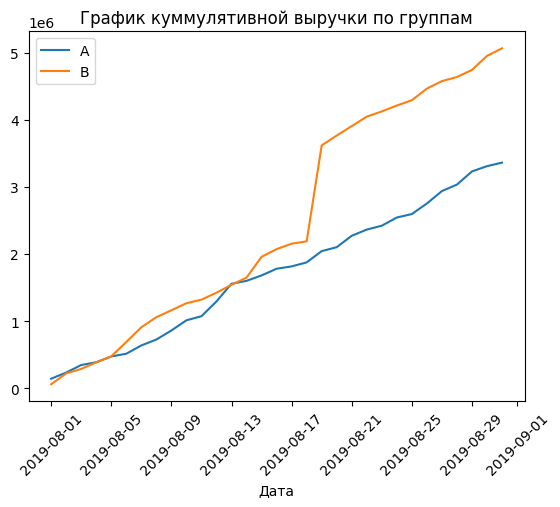

In [131]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.plot(figsize=(8, 6), grid=True)
plt.title('График куммулятивной выручки по группам')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Вывод**: Из графика видим, сегменты А И B до середины теста шли примерно на ровне, но от середины теста сегмент B вырвался вперёд и продолжал быть первым на протяжении всего теста. Вероятно это влияют аномальные заказы на такой результат.

#### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

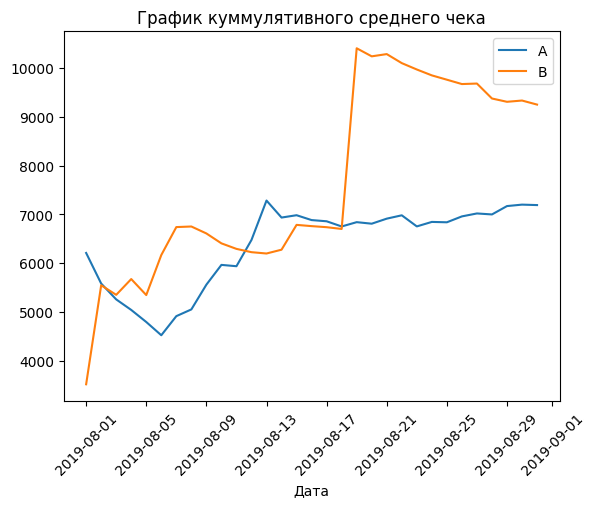

In [132]:
# Построим графики для каждой группы кумулятивного среднего  чека по  дням 
plt.plot(figsize=(8, 6), grid=True)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График куммулятивного среднего чека')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Вывод**: Куммулятивное значение среднего чека на графике в сегменте А и B колеблются. Мы видим, что сперва начинает лидировать сегмент А, потом сегмент А приходит в упадок, в середине графика чуть выходит вперёд и к концу графика падает. Сегмент B в конце графика выходит в лидеры.Вероятнее всего так влияют выбросы, которые искажают результат, поэтому принимать решение пока рано.

#### Пострим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

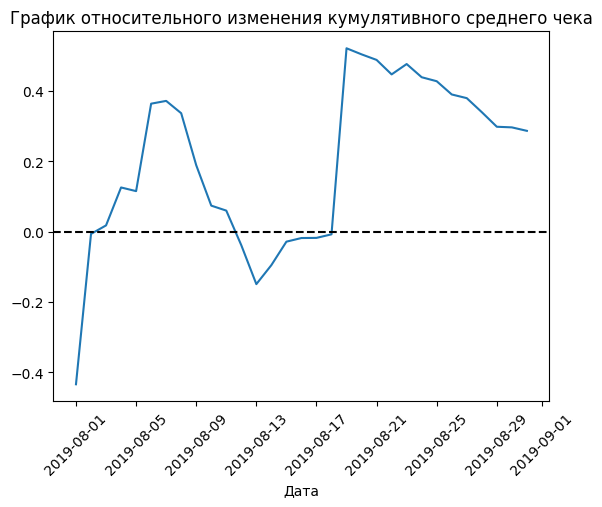

In [133]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека')
plt.xlabel('Дата')
plt.plot(figsize=(8, 6), grid=True)
plt.xticks(rotation=45)
plt.show()

**Вывод**: Результаты теста менялись по датам несколько раз, вероятно всего были совершены аномальные заказы. 

#### Построим график кумулятивного среднего количества заказов по группам. Сделем выводы и предположения.

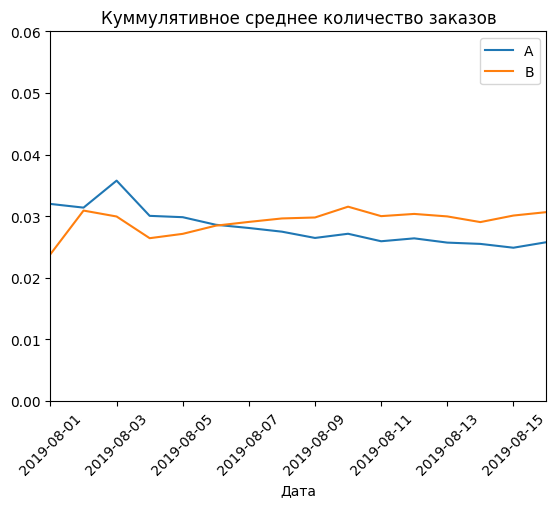

In [134]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 16), 0, 0.06])

plt.title('Куммулятивное среднее количество заказов')
plt.xlabel('Дата')
plt.plot(figsize=(8, 6), grid=True)
plt.xticks(rotation=45)
plt.show()

**Вывод**: В начале теста сегмент А имел большую конверсию, далее, примерно ближе к середине пошёл на спад, сегмент B опередил сегмент А и установился по уровню выше над ним, стал больше сегмента А. Чтобы было видно, что абсолютное значение колебания в начале и в конце теста не слишком большое: от 2% до 4%. мы изменили масштаб графика. Потому, если убрать масштаб осей, будет казаться, что колебания продолжаются, и конверсия не установилась около своего среднего значения.

#### Построим график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделаем выводы и предположения.

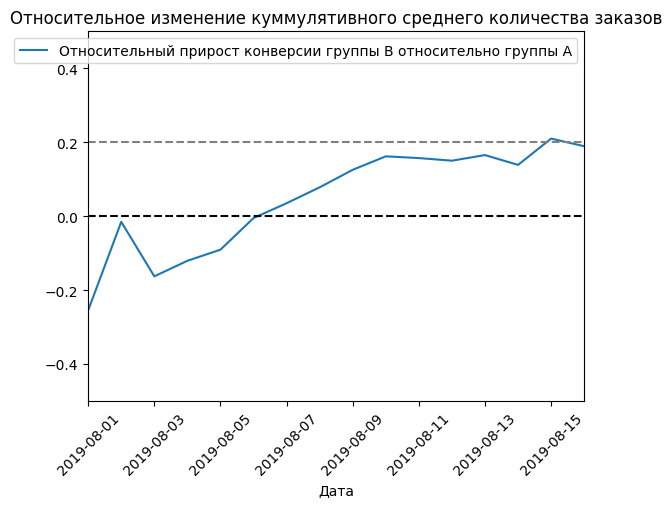

In [135]:
# Объединим таблицы  cumulativeDataA и cumulativeDataB методом merge() так, чтобы она содержала столбцы: ['date', 'conversionA', 'conversionB'].
# Сохраним в переменной mergedCumulativeConversions.

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                             left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# построим график относителньо различия кумулятивной конверсии группы B к группе A
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
 

# добавим пунктирную линию  оси X чёрного цвета со значением оси Y=0
# добавим одну линию оси X серого цвета со значением оси Y=0.2
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

# зададим масштаб
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 16), -0.5, 0.5])

plt.title('Относительное изменение куммулятивного среднего количества заказов')
plt.xlabel('Дата')
plt.plot(figsize=(8, 6), grid=True)
plt.xticks(rotation=45)
plt.show()

**Вывод**: Мы построили график относительного различия конверсии между группами. Видим колебания в относительном приросте. Но практически с самого начала теста группа B лидирует и чуть больше к середине достигает прирост примерно в 20 % после падает до 18 % и снова идёт на повышение, устанавливается.

#### Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

In [136]:
# Метод .groupby('...', as_index=False) сгруппирует заказы по пользователям
# Метод .agg({'...' : 'nunique',}) подсчитает число уникальных заказов по сгруппированным данным
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']
# Метод .sort_values(by='...',ascending=False) отсортирует датафрейм по значению в столбце
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

         userId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


Число заказов по пользователям получили. Теперь перейдём к визуальному анализу.

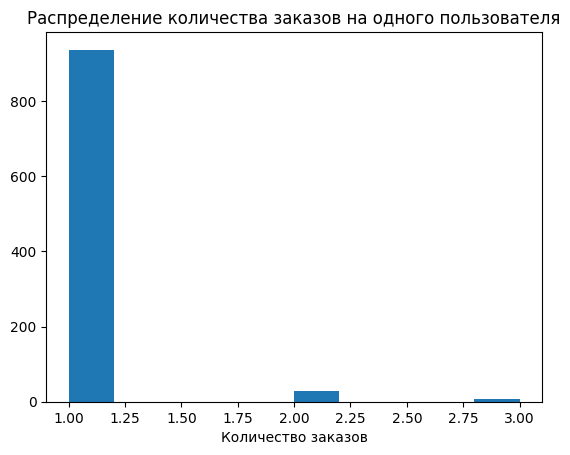

In [137]:
# Построим гистрограмму распределения количества заказов на одного пользователя.
plt.hist(ordersByUsers['orders'])
plt.title('Распределение количества заказов на одного пользователя')
plt.xlabel('Количество заказов')
plt.plot(figsize=(8, 6), grid=True)
plt.show()

Большинство пользователей совершило 1 заказ,так же есть пользователи, которые совершили 2,3,4,5,6 заказов.Но точного числа не можем сказать, построим график другого формата для определения пользователей, которые сделали заказ 2,3,4 и более раза. 

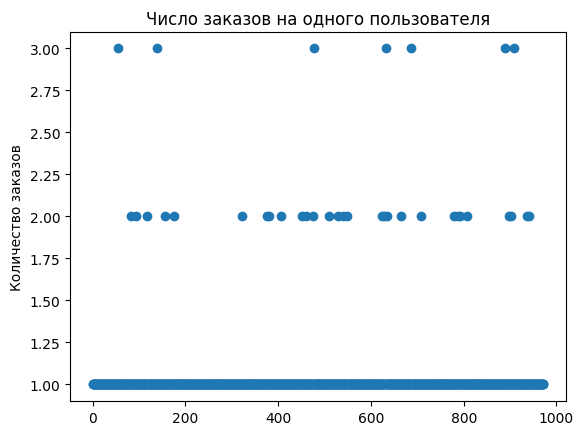

In [138]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

# Построим точечную диаграмму числа заказов на одного пользователя
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Число заказов на одного пользователя')
plt.ylabel('Количество заказов')
plt.plot(figsize=(8, 6), grid=True)
plt.show()

**Вывод**: Пользователей заказавших более двух достаточно большое количество, данные пользователи могут быть аномальными, пока их точная доля не ясна.

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [139]:
# Методом np.percentile('column', [percentile1, percentile2, percentile3]) находим перцентили.
# Выводим на экран
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 1. 2.]


**Вывод**: Не более 5% пользователей совершили больше двух заказов. И не более 10 % пользователя более 1 заказа, 1 % пользователей более 3 заказов.

#### Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

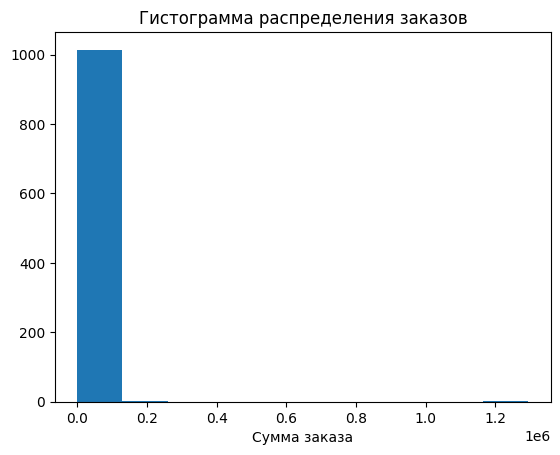

In [140]:
# Изучим гистограмму распределения стоимостей заказов
plt.hist(orders['revenue'])
plt.title('Гистограмма распределения заказов')
plt.xlabel('Сумма заказа')
plt.plot(figsize=(8, 6), grid=True)
plt.show()

Сумма большинства заказов меньше 170 000 рублей. Но мы не можем рассмотреть другие заказы, дорогие и распределение более дешёвых. Для более детального определения нам понадобится точечный график. 

      transactionId   visitorId       date  revenue group
0        3667963787  3312258926 2019-08-15     1650     B
1        2804400009  3642806036 2019-08-15      730     B
3        3797467345  1196621759 2019-08-15     9759     B
4        2282983706  2322279887 2019-08-15     2308     B
5         182168103   935554773 2019-08-15     2210     B
...             ...         ...        ...      ...   ...
1191     3592955527   608641596 2019-08-14    16490     B
1192     2662137336  3733762160 2019-08-14     6490     B
1193     2203539145   370388673 2019-08-14     3190     A
1194     1807773912   573423106 2019-08-14    10550     A
1196     3936777065  2108080724 2019-08-15   202740     B

[1016 rows x 5 columns]


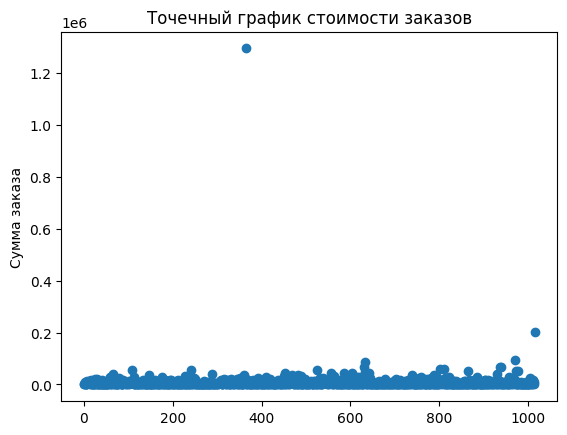

In [141]:
# в переменной x_values — сгенерированные номера наблюдений.
# Значения для вертикальной оси возьмём из столбца 'revenue' датафрейма orders.
x_values = pd.Series(range(0, len(orders['revenue'])))
# Постройте диаграмму методом scatter()
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимости заказов')
plt.ylabel('Сумма заказа')
print(orders)

**Вывод**: Есть выбросы в районе 200 000 рублей и выбросы с заказом в 1 200 000 рублей, вероятно это аномальный заказ.

#### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [142]:
# Посчитаем 90-й, 95-й и 99-й выборочные перцентили выручки с заказов 
print(np.percentile(orders['revenue'], [90, 95, 99]))

[17990. 26785. 53904.]


**Вывод**: Не более, чем у 5% заказов чек не дороже 26 758 рублей. И не больше, чем у 1% заказов — дороже 53 904 рублей. Суммы достаточно большие.

Выберем 4 или 5 заказов на одного пользователя за верхнюю границу числа заказов, и отсеим аномальных пользователей по ней.

#### Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделаем выводы и предположения.

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Начнём с подготовки данных. Напишем код для объедидения данных, таблицу назовём data1:

In [143]:
# сгруппируем пользователей группы А 
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# найдём количество пользователей до выбранной даты, включительно в группе А
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# сгруппируем пользователей группы B 
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# найдём количество пользователей до выбранной даты, включительно в группе B
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# сгруппируем заказы группы A
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# найдём суммарное число заказов до выбранной даты, включительно в группе А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# сгруппируем заказы группы B
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# найдём суммарное число заказов до выбранной даты, включительно в группе B 
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# получим датафрейм data1
data1 = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data1.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              23           142779              17   
1 2019-08-02              19            91602              23   
2 2019-08-03              24           112473              14   
3 2019-08-04              11            41176              14   
4 2019-08-05              22            86383              21   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0            59758                  23               142779   
1           162043                  42               234381   
2            67049                  66               346854   
3            96890                  77               388030   
4            89908                  99               474413   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  17                59758               719   
1                  40               221801               619   
2                  54               28

**Обозначим название столбцов**:
- date — дата;
- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;
- visitorsPerDateB — количество пользователей в выбранную дату в группе B;
- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.


Посчитаем статистическую значимость различия в среднем количестве заказов между группами.

**Сформулируем нулевую и альтернативную гипотезы**:

- H0: Различий в среднем количестве заказов между группами по «сырым» данным нет. 

- H1: Различий в среднем количестве заказов между группами по «сырым» данным есть. 

In [144]:
# Создадим фреймы ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders'] 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов
# тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.
# Список с количеством заказов для каждого из пользователей: ordersByUsersA['orders'] и ordersByUsersB['orders'] 
# Их количество равно разнице между суммой посетителей и количеством записей о заказах:
# Группы A: data1['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
# Группы B: data1['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])            
# Создадим объекты pd.Series нужной длины:

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data1['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data1['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# применим критерий и отформатируем p-value, округлив его до пяти знаков после запятой.
# найдём относительные различия в среднем количестве заказов между группами:
# значения огруглим до трёх знаков после запятой
print('p-value:', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительное различие:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.01102
Относительное различие: 0.160


**Вывод**: Применив метод  Манна-Уитни мы узнали что по сырым данным есть различия в среднем числе заказов групп А и групп B,  потому что первое число - p-value = 0.01102, меньше 0.05, поэтому нулевую гипотезу, что статистически значимых различий в среднем числе заказов между группами нет, мы отвергаем . Относительный прирост среднего группы B к конверсии группы A равен 16 %.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

**Сформулируем нулевую и альтернативную гипотезы**:

- H0: Различий в среднем чеке заказа между группами по «сырым» данным нет. 

- H1: Различий в среднем чеке заказа между группами по «сырым» данным есть.

In [145]:
# Теперь проверим статистическую значимость различий в среднем чеке между сегментами.
# Нулевая гипотеза: различий в среднем чеке между группами нет.
# Альтернативная гипотеза: различия в среднем чеке между группами есть.
print('p-value:','{0:.5f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
# средний чек группы B
print('различия в среднем чеке:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.82949
различия в среднем чеке: 0.287


**Вывод**: P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Относительное различие среднего чека между сегментами группы B к группе A 28,7%

#### Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделаем выводы и предположения.

**Очистим данные, уберём аномальных пользователей**

В предыдущих заданиях мы нашли 95-й и 99-й перцентили средних чеков равны 26 758 и 53 904 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.

Уберём аномальным пользователей, примим за аномальных пользователей тех кто совершил заказов 4 и более. И пользователей совершивших заказов на сумму свыше 40000 рублей 

In [146]:
# Приступаем к подготовке очищенных от аномалий данных.
# удалим пользователей , определим аномальные заказы 

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >4]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] >4]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 40000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.head(5))
# выводим аномальных пользователей, считаем их спомощью атрибута shape[0]
print(abnormalUsers.shape[0])

1099    148427295
684     358944393
648     382846391
1137    759473111
339     834731816
dtype: int64
23


Таких пользователей у нас получилось 23, в дальнейшее исследование их включать не будем

Создадим переменные sampleAFiltered и sampleBFiltered, в которых сохраним очищенные данные о заказах — не включая аномальных пользователей.

**Сформулируем нулевую и альтернативную гипотезы**:

- H0: Различий в среднем количестве заказов между группами по «очищенным» данным нет. 

- H1: Различий в среднем количестве заказов между группами по «очищенным» данным есть.

In [147]:
# Создадим переменные sampleAFiltered и sampleBFiltered, в которых сохраним очищенные данные о заказах
sampleAFiltered = pd.concat(   
     [    
    ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data1['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data1['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
# Выведем p-value для сравнения среднего между очищенными группами.
# Округлим p-value до пяти знаков после запятой.
# Выведем относительный прирост среднего очищенной группы B, округлив до трёх знаков после запятой.
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительный прирост среднего:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


p-value: 0.006
относительный прирост среднего: 0.178


**Вывод**: Если смотреть по «очищенным» данным, p-value равно 0.006, оно меньше 0.05. Значит нулевую гипотезу мы отвергаем. Следовательно различия  в среднем количестве заказов между группами по «очищенным» данным есть.  Относительное различие среднего чека между сегментами группы B к группе A 17.8%. Это говорит нам о том, что аномальные пользователи влияют на результат.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

**Сформулируем нулевую и альтернативную гипотезы**:

- H0: Различий в среднем чеке заказа между группами по «очищенным» данным нет. 

- H1: Различий в среднем чеке заказа между группами по «очищенным» данным есть.

In [148]:
# Посчитаем статистическую значимость различия средних чеков после удаления аномальных пользователей

print('p-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('статистическая значимость различий:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)


p-value: 0.831
статистическая значимость различий: 0.051


**Вывод**: p-value равен 0.831 значительно больше чем 0,05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Относительное различие среднего чека между сегментами группы B к группе A 5,1%.

#### Примим решение по результатам теста и объясним его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

**Примим решение по результатам теста**: 
-  Различия в среднем количестве заказов между группами A и B по «сырым» данным есть. Прирост группы B 16%

-  Различий в среднем чеке заказа между группами по «сырым» данным нет.
   Относительное различие среднего чека между сегментами группы B к группе A 28,7%

-  Различий в среднем количестве заказов между группами по «очищенным» данным есть.
   Относительное различие среднего чека между сегментами группы B к группе A 17.8%.
   
-  Различий в среднем чеке заказа между группами по «очищенным» данным нет.
   Относительное различие среднего чека между сегментами группы B к группе A 5,1%.  

-  График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо      зафиксировались около среднего значения.
-  График различия среднего чека колеблется: он и позволил нам выявить аномалии. Сделать из этого графика определённые выводы нельзя.

# Вывод : 
Мы остановливаем тест, так как продолжать дальше его нет смысла. Группа B лучше группы A по данным, а график конверсии говорит о фиксации результата.